# (AC)³ Winterschool - Workshop
## The link of atmospheric circulation regimes to local weather and climate at Hyytiälä (or at other Arctic locations)
**Lecturer:** Dörthe Handorf
**Date:** 13 March - 17 March 2023
**Author:** Johannes Röttenbacher


Use temperature profile data and relate it to the different regimes.
First date with measurement of all heights: 1997-01-01 00:00:00 UTC

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

regimes = dict(DJFM={1: "ATL-", 2: "NAO+", 3: "DIPOLE", 4: "SCAN/URAL", 5: "NAO-"},
               MAMJ={1: "ATL-", 2: "NAO+", 3: "SCAN/URAL", 4: "DIPOLE", 5: "NAO-"},
               JJAS={1: "NAO+", 2: "ATL-", 3: "SCAN/URAL", 4: "NAO-", 5: "DIPOLE"},
               SOND={1: "NAO+", 2: "ATL-", 3: "SCAN/URAL", 4: "DIPOLE", 5: "NAO-"})
cm = 1 / 2.54
figsize_wide = (24 * cm, 12 * cm)
month_to_season_lu = np.array([
    None,
    'DJF', 'DJF',
    'MAM', 'MAM', 'MAM',
    'JJA', 'JJA', 'JJA',
    'SON', 'SON', 'SON',
    'DJF'
])
seasons = ["DJF", "MAM", "JJA", "SON"]
cb_color_cycle = ["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99",
                  "#999933", "#882255", "#661100", "#6699CC", "#888888"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_color_cycle)

In [413]:
filepath = "./data/smeardata_20230313.csv"
ptg_path = "./data/smeardata_PTG.csv"
high_t_path = "./data/smeardata_T672_new_T125.csv"

ptg = pd.read_csv(ptg_path, header=0, parse_dates=[[0, 1, 2, 3, 4, 5]], infer_datetime_format=True)
ptg.columns = ["time", "PTG"]
ptg["time"] = pd.to_datetime(ptg["time"], format="%Y %m %d %H %M %S")
ptg = ptg.set_index("time")

high_t = pd.read_csv(high_t_path, header=0, parse_dates=[[0, 1, 2, 3, 4, 5]], infer_datetime_format=True)
high_t.columns = ["time", "T682", "T1250"]
high_t["time"] = pd.to_datetime(high_t["time"], format="%Y %m %d %H %M %S")
high_t = high_t.set_index("time")

df = pd.read_csv(filepath, header=0, parse_dates=[[0, 1, 2, 3, 4, 5]], infer_datetime_format=True)
df.columns = ["time", "T84", "T672", "T168", "T504", "T42", "T336"]
df["time"] = pd.to_datetime(df["time"], format="%Y %m %d %H %M %S")
df = df.set_index("time")

# merge datasets
df = df.join([high_t])
df

,T84,T672,T168,T504,T42,T336,T682,T1250
time,,,,,,,,
1997-01-01 00:00:00,-6.0960,-6.17050,-6.16450,-6.02850,-6.0575,-6.07500,NaN,NaN
1997-01-01 01:00:00,-5.9255,-6.09600,-6.00350,-5.91650,-5.8485,-5.93550,NaN,NaN
1997-01-01 02:00:00,-5.9595,-6.13050,-6.03100,-5.95300,-5.8815,-5.96050,NaN,NaN
1997-01-01 03:00:00,-5.9180,-6.04200,-5.98750,-5.86600,-5.8345,-5.89250,NaN,NaN
1997-01-01 04:00:00,-5.7700,-5.98800,-5.85250,-5.78500,-5.6985,-5.78300,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,NaN,3.00067,2.93317,2.96583,NaN,2.87083,NaN,NaN
2020-01-01 20:00:00,NaN,2.89700,2.78450,2.84033,NaN,2.71767,NaN,NaN
2020-01-01 21:00:00,NaN,3.43983,3.31100,3.37583,NaN,3.26183,NaN,NaN


In [414]:
regimes_all = pd.read_csv("./data/clustered_data_1979-2020_clusters_as_djfm.csv",
                          names=["time", "regime"], usecols=[0, 4], header=0)
regimes_all["time"] = pd.to_datetime(regimes_all["time"], format="%Y-%m-%d")
regimes_all

,time,regime
0,1979-01-01,3
1,1979-01-02,3
2,1979-01-03,3
3,1979-01-04,3
4,1979-01-05,3
...,...,...
15142,2019-11-26,5
15143,2019-11-27,5
15144,2019-11-28,5
15145,2019-11-29,5


In [415]:
df = df.interpolate(limit=1)
ptg = ptg.interpolate(limit=1)

In [416]:
df_res = df.resample("1D")
ptg_res = ptg.resample("1D")

In [417]:
df_daily_mean = df_res.agg(lambda x: x.mean(skipna=False))
ptg_daily_mean = ptg_res.agg(lambda x: x.mean(skipna=False))

In [418]:
df_merged = df_daily_mean.merge(regimes_all, on="time")
ptg_merged = ptg_daily_mean.merge(regimes_all, on="time")
df_merged = df_merged.replace(regimes["DJFM"])
ptg_merged = ptg_merged.replace(regimes["DJFM"])

In [419]:
df_long = pd.melt(df_merged, id_vars=["time", "regime"], var_name="altitude", value_name="air_temperature")
df_long["altitude"] = pd.to_numeric(df_long["altitude"].str.replace("T", "")) / 10
df_long["season"] = month_to_season_lu[df_long["time"].dt.month]
df_long

,time,regime,altitude,air_temperature,season
0,1997-01-01,DIPOLE,8.4,-8.106125,DJF
1,1997-01-02,DIPOLE,8.4,-7.773688,DJF
2,1997-01-03,DIPOLE,8.4,-4.907062,DJF
3,1997-01-04,DIPOLE,8.4,-10.557417,DJF
4,1997-01-05,NAO-,8.4,-13.836917,DJF
...,...,...,...,...,...
67163,2019-12-28,SCAN/URAL,125.0,NaN,DJF
67164,2019-12-29,NAO+,125.0,NaN,DJF
67165,2019-12-30,DIPOLE,125.0,2.665703,DJF
67166,2019-12-31,DIPOLE,125.0,-1.733323,DJF


In [475]:
df_grouped = df_long.groupby(["regime", "altitude", "season"])
df_data = df_grouped.mean()
df_data["std"] = df_grouped.std()
df_data["median"] = df_grouped.median()
for quant in [10, 25, 75, 90]:
    df_data[f"{quant}th_percentile"] = df_grouped.quantile(quant / 100).loc[:, "air_temperature"]
df_data = df_data.reset_index()
df_data

,regime,altitude,season,air_temperature,std,median,10th_percentile,25th_percentile,75th_percentile,90th_percentile
0,ATL-,4.2,DJF,-2.734443,4.790368,-1.342777,-8.518984,-4.917896,0.440180,1.857903
1,ATL-,4.2,JJA,14.869833,3.223261,14.717389,10.827050,12.598972,17.099140,19.179203
2,ATL-,4.2,MAM,4.647176,6.151443,4.350785,-2.644704,0.475047,9.552537,12.457450
3,ATL-,4.2,SON,7.054853,4.916525,7.227150,0.259036,3.859241,11.293552,12.985743
4,ATL-,8.4,DJF,-2.591176,4.706224,-1.440533,-8.187093,-4.860510,0.521527,2.288265
...,...,...,...,...,...,...,...,...,...,...
155,SCAN/URAL,68.2,SON,5.708105,6.205467,5.408770,-2.423756,1.184292,10.386486,14.705285
156,SCAN/URAL,125.0,DJF,-7.820314,4.390020,-8.152529,-13.381667,-11.229319,-4.369914,-2.345318
157,SCAN/URAL,125.0,JJA,16.879857,4.426384,16.214624,11.704423,13.496414,20.392465,23.523970
158,SCAN/URAL,125.0,MAM,7.457975,6.891115,6.656954,-0.825964,2.118640,12.904867,17.586381


In [505]:
# drop 68.2 m data (new PT100 sensor) because it is less accurate
df_long = df_long.loc[df_long["altitude"] != 68.2]
df_data = df_data.loc[df_data["altitude"] != 68.2]

In [506]:
for season in seasons:
    _, ax = plt.subplots(figsize=(24 * cm, 12 * cm))
    df_plot1 = df_data.loc[df_data.season == season]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1.regime == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4)
    ax.set_title(f"{season} Mean with standard deviation")
    ax.set_xlabel("Air Temperature (°C)")
    ax.set_ylabel("Altitude above ground (m)")
    ax.legend(title="Regime")
    ax.grid()
    figname = f"./plots/air_temperature_mean_std_{season}.png"
    plt.savefig(figname, dpi=100)
    plt.close()

In [507]:
for season in seasons:
    df_plot = df_long.loc[df_long["season"] == season]
    df_plot = df_plot.pivot(index=["time", "altitude"], columns="regime", values="air_temperature").reset_index()
    axs = df_plot.boxplot(by=["altitude"], notch=True, figsize=(10, 10), vert=True, medianprops=dict(color="#882255"))
    for ax in axs:
        for a in ax:
            a.set_xlabel("Altitude (m)")
            a.set_ylabel("Air Temperature (°C)")
    plt.suptitle(f"Boxplots of mean daily temperature - {season}")
    plt.tight_layout()
    figname = f"./plots/air_temperature_boxplot_regimes_{season}.png"
    plt.savefig(figname, dpi=300)
    plt.close()

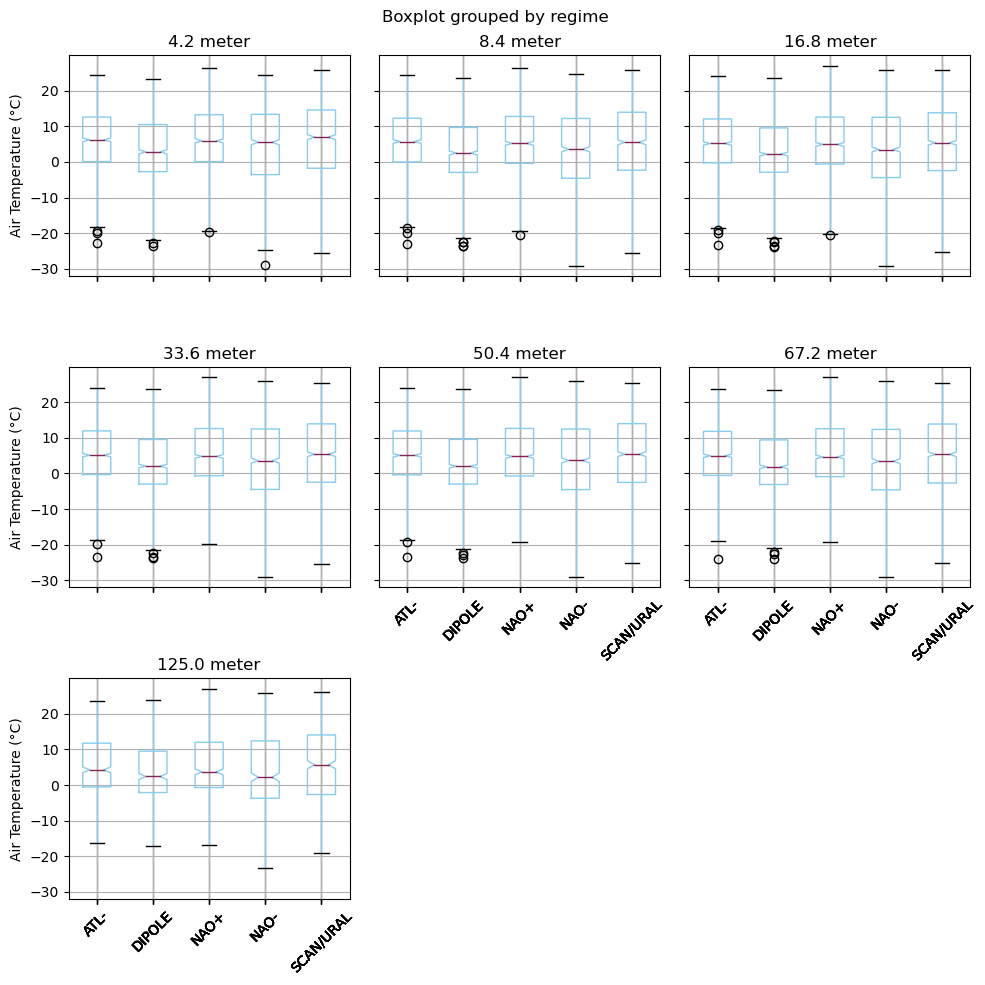

In [508]:
df_plot = df_long.pivot(index=["time", "regime"], columns="altitude", values="air_temperature").reset_index()
axs = df_plot.boxplot(by=["regime"], notch=True, figsize=(10, 10), rot=45, medianprops=dict(color="#882255"))
for i, ax in enumerate(axs):
    for a in ax:
        title = a.get_title()
        a.set_title(f"{title} meter")
        a.set_xlabel("")
        a.set_ylabel("Air Temperature (°C)")
plt.tight_layout()
figname = f"./plots/air_temperature_boxplot_altitudes.png"
plt.savefig(figname, dpi=300)

### Plot one 2x2 plot for each regime showing all altitudes and the four seasons

In [519]:
for regime in regimes["DJFM"].values():
    df_plot = df_long.loc[df_long["regime"] == regime].drop("regime", axis=1)
    df_plot = df_plot.pivot(index=["time", "altitude"], columns="season", values="air_temperature").reset_index()
    axs = df_plot.boxplot(by=["altitude"], notch=True, figsize=(8, 8), rot=0)
    for i, ax in enumerate(axs):
        for a in ax:
            a.set_xlabel("")
            a.set_ylabel("Air Temperature (°C)")

    if regime == "SCAN/URAL":
        regime = "SCAN_URAL"

    plt.suptitle(f"Boxplot of daily air temperature for {regime}")
    figname = f"./plots/air_temperature_boxplot_altitudes_{regime}.png"
    plt.savefig(figname, dpi=300, bbox_inches="tight")
    plt.close()

## Temperature profile all seasons

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
for i, season in enumerate(seasons):
    df_plot1 = df_data.loc[df_data["season"] == season]
    ax = axs.flat[i]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1["regime"] == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4, capthick=2)
        ax.grid()
        ax.set_title(season)

axs[0, 0].legend()
axs[0, 0].set_ylabel("Altitude (m)")
axs[1, 0].set_ylabel("Altitude (m)")
axs[1, 0].set_xlabel("Air Temperature (°C)")
axs[1, 1].set_xlabel("Air Temperature (°C)")

figname = f"./plots/mean_air_temperature_seasons.png"
plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()

## Temperature profile two seasons DJF, MAM

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for i, season in enumerate(seasons[:2]):
    df_plot1 = df_data.loc[df_data["season"] == season]
    ax = axs.flat[i]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1["regime"] == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4, capthick=2)
        ax.grid()
        ax.set_title(season)

axs[0].legend()
axs[0].set_ylabel("Altitude (m)")
axs[0].set_xlabel("Air Temperature (°C)")
axs[1].set_xlabel("Air Temperature (°C)")

figname = f"./plots/mean_air_temperature_seasons_1.png"
plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()

## Temperature profile two seasons JJA, SON

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for i, season in enumerate(seasons[2:]):
    df_plot1 = df_data.loc[df_data["season"] == season]
    ax = axs.flat[i]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1["regime"] == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4, capthick=2)
        ax.grid()
        ax.set_title(season)

axs[0].legend()
axs[0].set_ylabel("Altitude (m)")
axs[0].set_xlabel("Air Temperature (°C)")
axs[1].set_xlabel("Air Temperature (°C)")

figname = f"./plots/mean_air_temperature_seasons_2.png"
plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()

## Temperature profile 2 seasons DJF, JJA

In [510]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for i, season in enumerate(seasons[::2]):
    df_plot1 = df_data.loc[df_data["season"] == season]
    ax = axs.flat[i]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1["regime"] == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4, capthick=2)
        ax.grid()
        ax.set_title(season)

axs[0].legend()
axs[0].set_ylabel("Altitude (m)")
axs[0].set_xlabel("Air Temperature (°C)")
axs[1].set_xlabel("Air Temperature (°C)")

figname = f"./plots/mean_air_temperature_seasons_3.png"
plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()

## Temperature profile one season

In [518]:
for i, season in enumerate(seasons):
    fig, ax = plt.subplots(figsize=(6, 3))
    df_plot1 = df_data.loc[df_data["season"] == season]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1["regime"] == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4, capthick=2)
        ax.grid()
        # ax.set_title(season)

    ax.legend()
    ax.set_ylabel("Altitude (m)")
    ax.set_xlabel("Air Temperature (°C)")
    ax.set_xlabel("Air Temperature (°C)")

    figname = f"./plots/mean_air_temperature_{season}.png"
    plt.savefig(figname, dpi=300, bbox_inches="tight")
    plt.close()

## Plot only data starting in October 2012

In [426]:
df_long_2012 = df_long.loc[df_long["time"] > pd.Timestamp("2012-09-30 23:59")]

In [427]:
df_grouped = df_long_2012.groupby(["regime", "altitude", "season"])
df_data_2012 = df_grouped.mean()
df_data_2012["std"] = df_grouped.std()
df_data_2012["median"] = df_grouped.median()
for quant in [10, 25, 75, 90]:
    df_data_2012[f"{quant}th_percentile"] = df_grouped.quantile(quant / 100).loc[:, "air_temperature"]
df_data_2012 = df_data_2012.reset_index()
df_data_2012

,regime,altitude,season,air_temperature,std,median,10th_percentile,25th_percentile,75th_percentile,90th_percentile
0,ATL-,4.2,DJF,-2.574226,4.473496,-1.014118,-8.279078,-4.898084,0.251903,1.260769
1,ATL-,4.2,JJA,14.991906,3.545197,14.962813,10.749535,12.295058,17.299685,19.643302
2,ATL-,4.2,MAM,5.266324,6.460619,5.567455,-2.437324,0.299446,10.544079,13.523579
3,ATL-,4.2,SON,6.813177,4.407382,6.456748,1.436091,3.505654,9.900226,13.011589
4,ATL-,8.4,DJF,-2.017748,4.071494,-0.644991,-6.478652,-4.870191,0.505614,1.612079
...,...,...,...,...,...,...,...,...,...,...
155,SCAN/URAL,68.2,SON,5.681803,6.234837,5.225014,-2.443612,1.116244,10.486489,14.714174
156,SCAN/URAL,125.0,DJF,-7.820314,4.390020,-8.152529,-13.381667,-11.229319,-4.369914,-2.345318
157,SCAN/URAL,125.0,JJA,16.879857,4.426384,16.214624,11.704423,13.496414,20.392465,23.523970
158,SCAN/URAL,125.0,MAM,7.457975,6.891115,6.656954,-0.825964,2.118640,12.904867,17.586381


In [428]:
for season in seasons:
    _, ax = plt.subplots(figsize=(24 * cm, 12 * cm))
    df_plot1 = df_data_2012.loc[df_data_2012.season == season]
    for regime in regimes["DJFM"].values():
        df_plot = df_plot1.loc[df_plot1.regime == regime]
        ax.errorbar(df_plot["air_temperature"], y=df_plot["altitude"], xerr=df_plot["std"],
                    label=f"{regime}", marker="o", capsize=4)
    ax.set_title(f"{season} Mean with standard deviation - 2012 onward")
    ax.set_xlabel("Air Temperature (°C)")
    ax.set_ylabel("Altitude above ground (m)")
    ax.legend(title="Regime")
    figname = f"./plots/{season}_air_temperature_mean_std_2012.png"
    plt.savefig(figname, dpi=100)
    plt.close()

## Compare time series of 67.2 m temperature between new and old sensor setup

In [429]:
df_672 = df_long_2012.loc[df_long_2012["altitude"].isin([67.2, 68.2])]
df_672 = df_672.pivot(index=["time", "regime", "season"], columns="altitude", values="air_temperature").reset_index()
df_672.columns = ["time", "regime", "season", "old", "new"]
df_672["difference"] = df_672["old"] - df_672["new"]

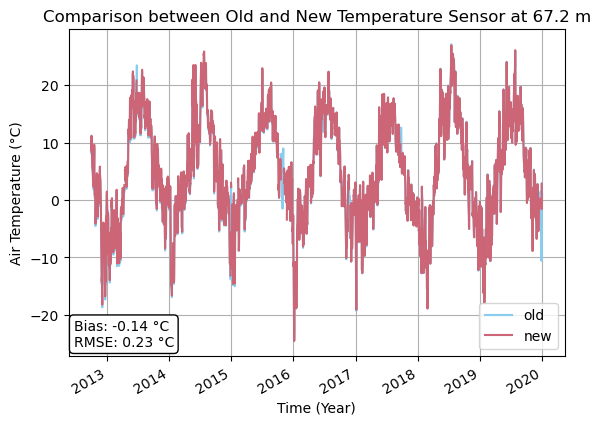

In [430]:
difference = df_672["difference"]
bias = np.mean(difference)
rmse = np.sqrt(np.mean(difference ** 2))
_, ax = plt.subplots()
df_672.plot(x="time", y=["old", "new"], ax=ax)
ax.text(0.01, 0.02, f"Bias: {bias:.2f} °C\nRMSE: {rmse:.2f} °C", bbox={'boxstyle': 'round', 'fc': 'white'},
        transform=ax.transAxes, va="bottom")
ax.set_title("Comparison between Old and New Temperature Sensor at 67.2 m")
ax.set_xlabel("Time (Year)")
ax.set_ylabel("Air Temperature (°C)")
ax.grid()
figname = "./plots/temperature_sensor_comparison_all_data.png"
plt.savefig(figname, dpi=300)

### Plot with NaN values removed

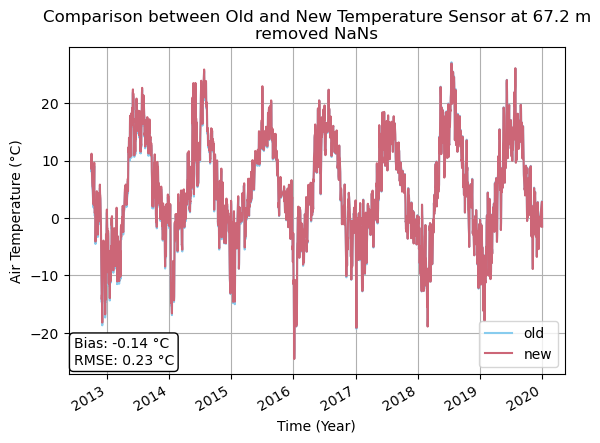

In [431]:
df_plot = df_672.dropna(axis="index")
difference = df_plot["difference"]
bias = np.mean(difference)
rmse = np.sqrt(np.mean(difference ** 2))
_, ax = plt.subplots()
df_plot.plot(x="time", y=["old", "new"], ax=ax)
ax.text(0.01, 0.02, f"Bias: {bias:.2f} °C\nRMSE: {rmse:.2f} °C", bbox={'boxstyle': 'round', 'fc': 'white'},
        transform=ax.transAxes, va="bottom")
ax.set_title("Comparison between Old and New Temperature Sensor at 67.2 m\nremoved NaNs")
ax.set_xlabel("Time (Year)")
ax.set_ylabel("Air Temperature (°C)")
ax.grid()
figname = "./plots/temperature_sensor_comparison_all_data_noNan.png"
plt.savefig(figname, dpi=300)

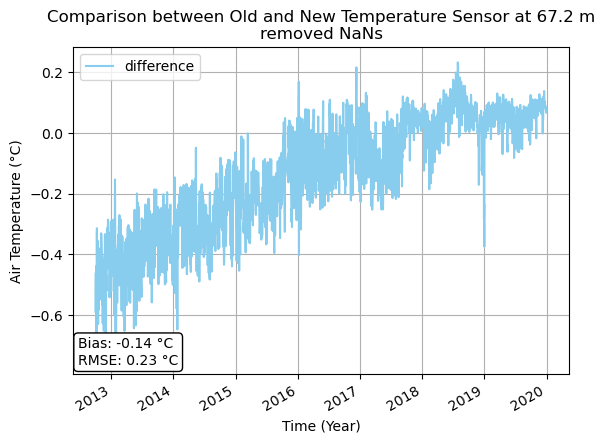

In [393]:
df_plot = df_672.dropna(axis="index")
difference = df_plot["difference"]
bias = np.mean(difference)
rmse = np.sqrt(np.mean(difference ** 2))
_, ax = plt.subplots()
df_plot.plot(x="time", y="difference", ax=ax)
ax.text(0.01, 0.02, f"Bias: {bias:.2f} °C\nRMSE: {rmse:.2f} °C", bbox={'boxstyle': 'round', 'fc': 'white'},
        transform=ax.transAxes, va="bottom")
ax.set_title("Comparison between Old and New Temperature Sensor at 67.2 m\nremoved NaNs")
ax.set_xlabel("Time (Year)")
ax.set_ylabel("Air Temperature (°C)")
ax.grid()
figname = "./plots/temperature_sensor_comparison_difference_all_data_noNan.png"
plt.savefig(figname, dpi=300)

The new temperature sensor has a bias of 0.14°C towards higher temperatures.

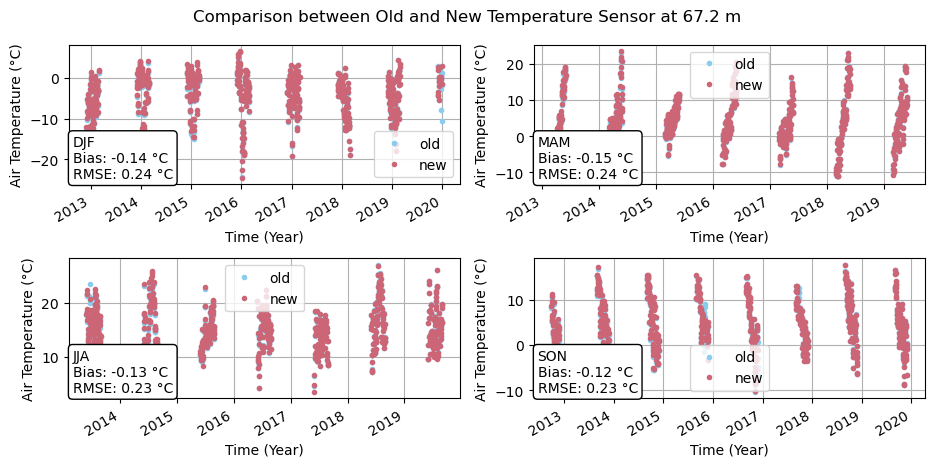

In [432]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize_wide)
for i, season in enumerate(seasons):
    df_plot = df_672.loc[df_672["season"] == season]
    ax = axs.flat[i]
    bias = np.mean(df_plot["difference"])
    rmse = np.sqrt(np.mean(df_plot["difference"] ** 2))
    df_plot.plot(x="time", y=["old", "new"], ax=ax, marker=".", ls="")
    ax.text(0.01, 0.02, f"{season}\nBias: {bias:.2f} °C\nRMSE: {rmse:.2f} °C",
            bbox={'boxstyle': 'round', 'fc': 'white'},
            transform=ax.transAxes, va="bottom")
    ax.set_xlabel("Time (Year)")
    ax.set_ylabel("Air Temperature (°C)")
    ax.grid()
fig.suptitle("Comparison between Old and New Temperature Sensor at 67.2 m")
plt.tight_layout()
figname = "./plots/temperature_sensors_comparison_seasons.png"
plt.savefig(figname, dpi=300)

### Zoom in

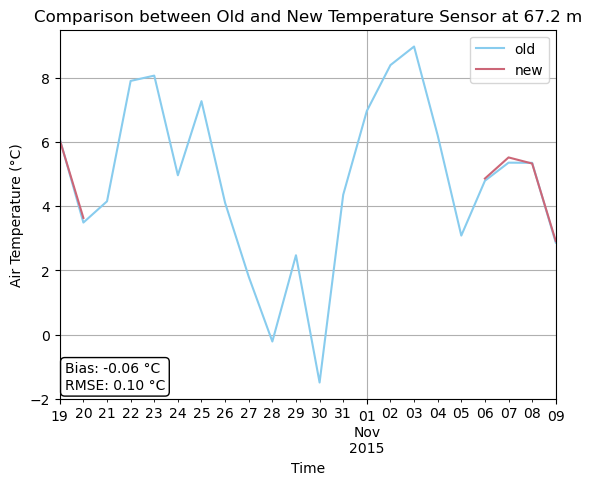

In [433]:
start_date, end_date = pd.Timestamp("2015-10-18"), pd.Timestamp("2015-11-10")
selection = (df_672["time"] > start_date) & (df_672["time"] < end_date)
df_plot = df_672.loc[selection]
difference = df_plot["difference"]
bias = np.mean(difference)
rmse = np.sqrt(np.mean(difference ** 2))
_, ax = plt.subplots()
df_plot.plot(x="time", y=["old", "new"], ax=ax)
ax.text(0.01, 0.02, f"Bias: {bias:.2f} °C\nRMSE: {rmse:.2f} °C", bbox={'boxstyle': 'round', 'fc': 'white'},
        transform=ax.transAxes, va="bottom")
ax.set_title("Comparison between Old and New Temperature Sensor at 67.2 m")
ax.set_xlabel("Time")
ax.set_ylabel("Air Temperature (°C)")
ax.grid()
figname = f"./plots/temperature_sensor_comparison_zoom_{start_date:%Y%m%d}-{end_date:%Y%m%d}.png"
plt.savefig(figname, dpi=300)

## Plot potential temperature gradient

In [446]:
ptg_merged["season"] = month_to_season_lu[ptg_merged["time"].dt.month]
ptg_grouped = ptg_merged.groupby(["regime", "season"])
ptg_data = ptg_grouped.mean()
ptg_data["std"] = ptg_grouped.std()
ptg_data["median"] = ptg_grouped.median()
for quant in [10, 25, 75, 90]:
    ptg_data[f"{quant}th_percentile"] = ptg_grouped.quantile(quant / 100).loc[:, "PTG"]
ptg_data = ptg_data.reset_index()
ptg_data

,regime,season,PTG,std,median,10th_percentile,25th_percentile,75th_percentile,90th_percentile
0,ATL-,DJF,0.001639,0.008709,0.000170,-0.004270,-0.000497,0.001937,0.006354
1,ATL-,JJA,0.005188,0.006029,0.004280,-0.001342,0.001255,0.008827,0.013482
2,ATL-,MAM,0.004532,0.006620,0.002874,-0.001878,-0.000017,0.007544,0.013578
3,ATL-,SON,0.003296,0.005798,0.001667,-0.001391,0.000040,0.005250,0.009904
4,DIPOLE,DJF,0.007938,0.014418,0.003063,-0.001538,0.000257,0.009972,0.024848
5,DIPOLE,JJA,0.004432,0.005438,0.003624,-0.001433,0.001185,0.007882,0.011317
6,DIPOLE,MAM,0.002798,0.006327,0.001191,-0.002826,-0.000890,0.005277,0.010162
7,DIPOLE,SON,0.004798,0.006448,0.003049,-0.000274,0.000493,0.007368,0.013175
8,NAO+,DJF,0.006218,0.014413,0.001070,-0.002182,-0.000007,0.006413,0.021984
9,NAO+,JJA,0.005740,0.006288,0.004954,-0.001732,0.001143,0.009694,0.014445


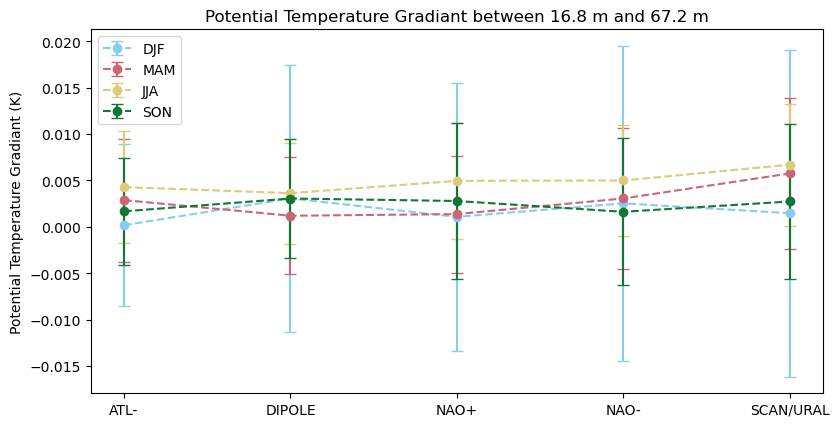

In [474]:
_, ax = plt.subplots(figsize=figsize_wide)
for season in seasons:
    df_plot = ptg_data.loc[ptg_data["season"] == season]
    ax.errorbar(data=df_plot, x="regime", y="median", yerr="std", marker="o", ls="--", label=season, capsize=4)
    ax.set_ylabel("Potential Temperature Gradiant (K)")
    ax.set_title("Potential Temperature Gradiant between 16.8 m and 67.2 m")
    ax.legend()